
#Matheus Inácio Silva Mol

##ATV0_SEPARADORES_LINEARES_3

Comparar separadores lineares Voltar para: Fundamentos Utilizar uma base de dados multiclasse não sintética para comparar o perceptron linear implementado em classe com outro separador linear do scikit-learn.

Entrega: link para python notebook no GitHub.


In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Dataset

In [2]:
X, y = breast_cancer.data, breast_cancer.target
X.shape, y.shape

((569, 30), (569,))

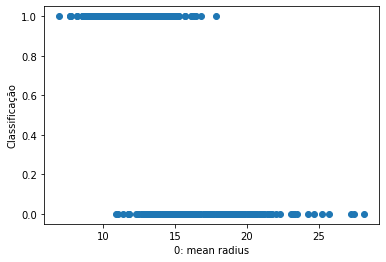

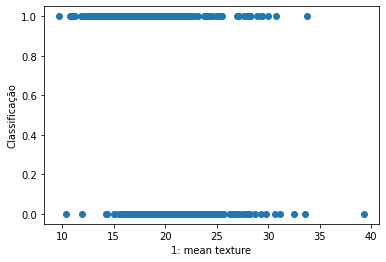

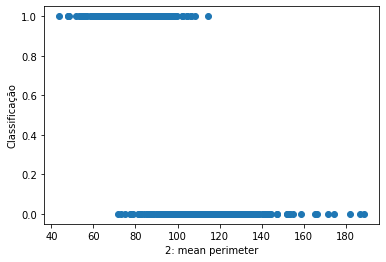

In [3]:
import matplotlib.pyplot as plt
for i in range(3):
    plt.xlabel(f"{i}: {breast_cancer.feature_names[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X[:,i], y)
    plt.show()

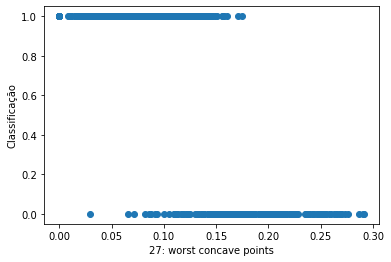

In [4]:
X27 = X[:,27:28]
plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)
plt.show()

### Classificador Perceptron


In [5]:
def sign(a):
  return (a >= 0) * 2 - 1

def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
#import random
import numpy as np


def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
     self.w = None
     self.activation = sign
     self.max_iter = max_iter

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

Xtr = X27
ytr = y

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)


0.6274165202108963
[ 522.37281116 -905.14853499]


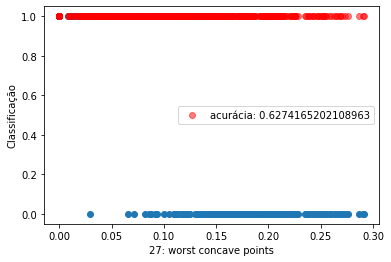

In [7]:
plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)
perceptron = Perceptron()
perceptron.fit(X27,y)
ypred = perceptron.predict(X27)
acuracia_1 = accuracy(y, ypred)
plt.plot(X27, ypred, 'ro', label=f"acurácia: {acuracia_1}", alpha=0.5)
plt.legend()
plt.show()

### Classificador ScikitLearn


c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


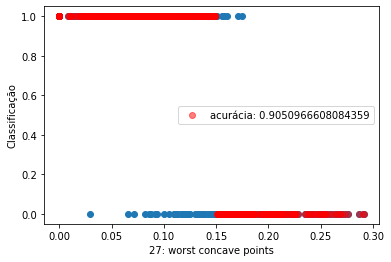

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

plt.xlabel(f"27: {breast_cancer.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27, y)
modelo = MLPClassifier()
modelo.fit(X27,y)
ypred = modelo.predict(X27)
#ypred = (ypred>0.5).astype(int)
acuracia_2 = accuracy_score(y, ypred)
plt.plot(X27, ypred, 'ro', label=f"acurácia: {acuracia_2}", alpha=0.5)
plt.legend()
plt.show()



### Resultado Final


In [9]:
print(f"Acurácia Classificador Perceptron = {acuracia_1}")
print(f"Acurácia Classificador Scikitlearn = {acuracia_2}")

Acurácia Classificador Perceptron = 0.6274165202108963
Acurácia Classificador Scikitlearn = 0.9050966608084359
